In [33]:
import torch
import torch.nn as nn
import numpy as np
import math
from torch.autograd import Variable

#Y_tau = sigma * torch.randn(64,64)
#print(Y_tau)

def gauss_mcmc_simulate(Y_0 ,langevin_step_size ,langevin_step_num ,sigma, image_size):
    Y_tau = Y_0
    for i in range(langevin_step_num):
        noise = torch.randn(image_size)
        Y_tau = Y_tau - 0.5 * langevin_step_size * langevin_step_size * \
        (Y_tau / sigma / sigma) + langevin_step_size * noise
        #print(Y_tau)
    return Y_tau

def gauss_omega_mcmc_simulate(Y_0 ,langevin_step_size ,langevin_step_num ,sigma, image_size, H):
    Y_tau = Y_0
    c = [abs(tau + 1) ** (2 * H) + abs(tau - 1) ** (2 * H) - 2 * abs(tau) ** (2 * H) for tau in range(image_size)]
    cov = np.zeros((image_size, image_size))
    for i in range(image_size):
        for j in range(image_size):
            cov[i][j] = c[abs(i - j)]
    inv_cov = np.linalg.inv(cov) 
    inv_covariance = torch.Tensor(inv_cov)
    #print(Y_tau)
    #print(inv_covariance)
    #print(Y_tau.matmul(inv_covariance))
    for i in range(langevin_step_num):
        noise = torch.randn(image_size)
        Y_tau = Y_tau - 0.5 * langevin_step_size * langevin_step_size * \
        (2 * Y_tau.matmul(inv_covariance) / sigma / sigma) + langevin_step_size * noise
        #print(Y_tau, i)
    return Y_tau


def gauss_omega_mcmc_simulate_omega(Y_0 ,langevin_step_size ,langevin_step_num ,sigma, image_size, beta):
    Y_tau = Y_0
    omegat = range(image_size) 
    omega = [math.pi / image_size * (x - 0.5 * image_size) for x in omegat]
    #print(omega)
    beta_omega = torch.Tensor([(abs(xx) ** beta / image_size ) for xx in omega])
    #print(beta_omega)
    for i in range(langevin_step_num):
        Y_tau = Variable(Y_tau, requires_grad=True)
        noise = torch.randn(image_size)
        #print(Y_tau.size())
        Y_ftau = torch.rfft(Y_tau ,1 ,onesided=False)
        #print(Y_ftau.size())
        Y_aftau = Y_ftau[:,0]*Y_ftau[:,0]+Y_ftau[:,1]*Y_ftau[:,1]
        #print(Y_aftau.size())
        #print(i)
        log_pY = -0.5 * Y_aftau.dot(beta_omega)
        log_pY.backward()
        #print(i, Y_tau, noise, Y_tau.grad)
        Y_tau = Y_tau + 0.5 * langevin_step_size * langevin_step_size * \
        (Y_tau.grad / sigma / sigma) + langevin_step_size * noise
        #print(Y_tau)
    return Y_tau.data.numpy()
#def gauss_omega_mcmc_simulate(Y_0 ,langevin_step_size ,langevin_step_num ,sigma, image_size, beta):
#    Y_tau = Y_0
#    omegat = range(image_size * image_size) 
#    omega = [math.pi / image_size / image_size * (x - 0.5 * image_size * image_size) for x in omegat]
#    #beta_omega = [abs(xx ** beta / image_size / image_size) for xx in omega]
#    beta_omega = [xx ** beta / image_size / image_size for xx in omega]
#    beta_omega = torch.from_numpy(beta_omega)
#    print(beta_omega)
#    for i in range(langevin_step_num):
#        noise = torch.randn(image_size, image_size)
#        Y_ftau = torch.rfft(Y_tau ,2 ,onesided=False)
#        Y_aftau = torch.sqrt(Y_ftau[:,:,0]*Y_ftau[:,:,0]+Y_ftau[:,:,1]*Y_ftau[:,:,1])
#        #print(Y_aftau.shape)
#        Y_tau = Y_tau - 0.5 * langevin_step_size * langevin_step_size * \
#        (sum(beta_omega) * Y_tau / sigma / sigma) + langevin_step_size * noise
#        print(Y_tau)
#    return Y_tau

#image_size = 128
#Y_0 = sigma * torch.randn(image_size,image_size)
#Y_u0 = 0.1 * sigma * torch.rand(image_size,image_size)
#out = torch.rfft(Y_u0,2,onesided=False)
#oo = torch.sqrt(out[:,:,0]*out[:,:,0]+out[:,:,1]*out[:,:,1])
#print(oo.shape)
#print(Y_u0)
#print(oo)

(array([8.44400387e-04, 1.24388116e-03, 5.27792638e-04, 4.23260727e-04,
        7.94023556e-04, 9.14222331e-04, 6.18372253e-04, 2.87778568e-04,
        1.50855764e-04, 2.20245247e-04, 5.79656610e-04, 1.28224598e-03,
        2.13049853e-03, 2.75582855e-03, 2.82843347e-03, 2.21847211e-03,
        1.18986224e-03, 3.59739356e-04, 1.45192308e-04, 4.03045654e-04,
        7.48565542e-04, 8.46641333e-04, 5.64611118e-04, 2.22578983e-04,
        2.36393457e-04, 5.59060180e-04, 9.95376636e-04, 1.46151001e-03,
        1.64486373e-03, 1.24222667e-03, 5.16378711e-04, 4.05658611e-05,
        1.05719567e-04, 6.37159900e-04, 1.40074388e-03, 2.01136821e-03,
        2.05827163e-03, 1.57976170e-03, 1.03873609e-03, 7.38364087e-04,
        6.63542929e-04, 6.62316907e-04, 6.98798324e-04, 1.07208421e-03,
        1.80303125e-03, 2.11689821e-03, 1.56188760e-03, 8.62266106e-04,
        7.33315404e-04, 8.22283860e-04, 5.26854681e-04, 1.55437264e-04,
        4.95088512e-04, 1.33327997e-03, 1.54659974e-03, 1.047436

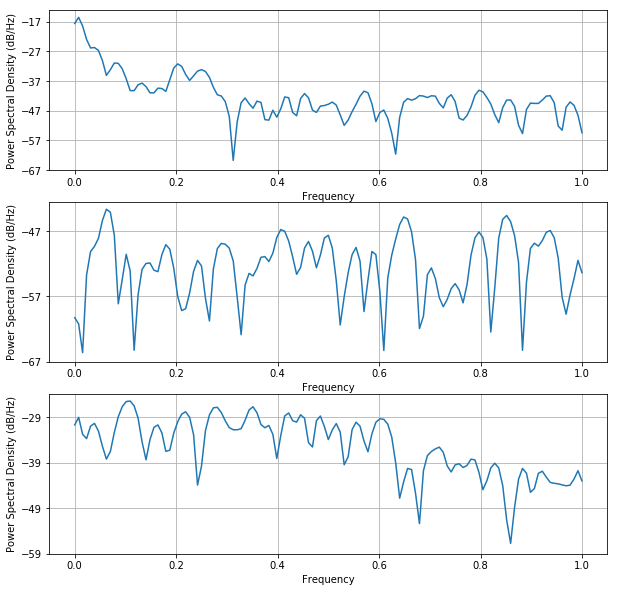

In [82]:
import pylab as plt
langevin_step_size = 0.01
sigma = 0.0618
langevin_step_num = 2000
H = 0.99
beta = -1.2
image_size = 101

Y_0 = 0.1 * sigma * torch.randn(image_size)
Y_u0 = 0.1 * sigma * torch.rand(image_size)
Y_u = 0.1 * sigma * torch.ones(image_size)

Y_out2 = gauss_mcmc_simulate(Y_0 ,langevin_step_size ,langevin_step_num ,sigma, image_size)
Y_out = gauss_omega_mcmc_simulate(Y_0 ,langevin_step_size ,langevin_step_num ,sigma, image_size, H)
Y_out1 = gauss_omega_mcmc_simulate_omega(Y_0 ,langevin_step_size ,langevin_step_num ,sigma, image_size, beta)
#print(Y_out)

#print(Y_u)
#print(Y_out)

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.psd(Y_out)
#plt.subplot(212)
plt.subplot(312)
plt.psd(Y_0)
plt.subplot(313)
plt.psd(Y_out1)

(array([2.31084894e-07, 4.51141697e-07, 4.19461512e-07, 3.71077009e-07,
        3.11749201e-07, 2.48027227e-07, 1.86160971e-07, 1.31182546e-07,
        8.63281765e-08, 5.28746356e-08, 3.03593585e-08, 1.70699927e-08,
        1.06473781e-08, 8.65086937e-09, 8.97730583e-09, 1.00859838e-08,
        1.10407575e-08, 1.14207890e-08, 1.11665122e-08, 1.04196393e-08,
        9.39469098e-09, 8.29565857e-09, 7.27361782e-09, 6.41307368e-09,
        5.73520206e-09, 5.21068347e-09, 4.77895925e-09, 4.37190999e-09,
        3.93830550e-09, 3.46305331e-09, 2.97480175e-09, 2.53815589e-09,
        2.23199634e-09, 2.12091504e-09, 2.22995808e-09, 2.53203277e-09,
        2.95265920e-09, 3.39015780e-09, 3.74364782e-09, 3.93874287e-09,
        3.94245232e-09, 3.76361517e-09, 3.44099158e-09, 3.02545093e-09,
        2.56389508e-09, 2.09049249e-09, 1.62672876e-09, 1.18768807e-09,
        7.89633334e-10, 4.54149534e-10, 2.06436202e-10, 6.84805847e-11,
        5.03127292e-11, 1.43341669e-10, 3.18785483e-10, 5.321316

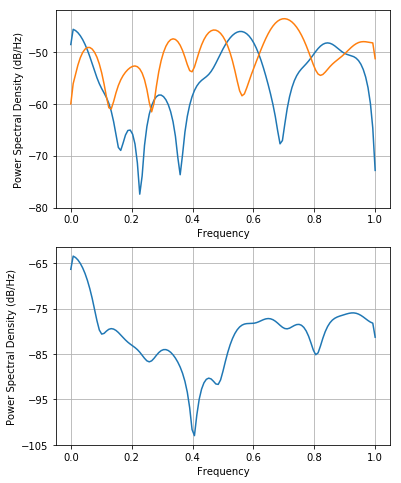

In [3]:
import pylab as plt
langevin_step_size = 0.01
sigma = 0.1  
langevin_step_num = 100
image_size = 32
Y_0 = sigma * torch.randn(image_size)
Y_u0 = 0.1 * sigma * torch.rand(image_size)


Y_out = gauss_mcmc_simulate(Y_u0 ,langevin_step_size ,langevin_step_num ,sigma, image_size)
#print(Y_out)


plt.figure(figsize=(6,8))
plt.subplot(211)
plt.psd(Y_0)
#plt.subplot(212)
plt.psd(Y_out)
plt.subplot(212)
plt.psd(Y_u0)

In [4]:
import math
image_size =4
omegat = range(image_size * image_size) 
omega = [math.pi / image_size / image_size * (x - 0.5 * image_size * image_size) for x in omegat]
beta = 0.1
beta_omega = [abs(xx ** beta / image_size / image_size) for xx in omega]
print(omega)
print(sum(beta_omega))
print(1/max(beta_omega))

[-1.5707963267948966, -1.3744467859455345, -1.1780972450961724, -0.9817477042468103, -0.7853981633974483, -0.5890486225480862, -0.39269908169872414, -0.19634954084936207, 0.0, 0.19634954084936207, 0.39269908169872414, 0.5890486225480862, 0.7853981633974483, 0.9817477042468103, 1.1780972450961724, 1.3744467859455345]
0.9069024508903286
15.293539001264099


In [5]:
import torch
import numpy as np
image_size = 4
H = 0.5
c = [abs(tau + 1) ** (2 * H) + abs(tau - 1) ** (2 * H) - 2 * abs(tau) ** (2 * H) for tau in range(image_size)]
print(c)
cov = np.zeros((image_size, image_size))
print(cov)
for i in range(image_size):
    for j in range(image_size):
        cov[i][j] = c[abs(i - j)]
print(cov)
inv_cov = np.linalg.inv(cov) 
print(inv_cov)
inv_covariance = torch.from_numpy(inv_cov)
print(inv_covariance)

[2.0, 0.0, 0.0, 0.0]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]]
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
tensor([[0.5000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.5000]], dtype=torch.float64)


In [6]:
import torch
from torch.autograd import Variable
import math

x = Variable(torch.Tensor([2]), requires_grad=True)
y = x + 2
z = y ** 2 + 3
print(z)

z.backward()
print(x.grad)

sigma = 1
image_size = 8

beta = 0.5
omegat = range(image_size) 
print(omegat)
omega = [math.pi / image_size * (x - 0.5 * image_size) for x in omegat]
print(omega)
beta_omega = torch.Tensor([abs(xx ** beta / image_size ) for xx in omega])
print(beta_omega.size())


Y_tau = Variable(0.1 * sigma * torch.ones(image_size), requires_grad=True)
print(Y_tau)
Y_ftau = torch.rfft(Y_tau ,1 ,onesided=False)
print(Y_ftau)
Y_aftau = Y_ftau[:,0]*Y_ftau[:,0]+Y_ftau[:,1]*Y_ftau[:,1]
print(Y_aftau.size())
log_pY = -0.5 * Y_aftau.dot(beta_omega) 
print(log_pY)
log_pY.backward()
print(Y_tau.grad)
def gauss_omega_mcmc_simulate(Y_0 ,langevin_step_size ,langevin_step_num ,sigma, image_size, beta):
    Y_tau = Variable(Y_0, requires_grad=True)
    omegat = range(image_size) 
    omega = [math.pi / image_size * (x - 0.5 * image_size) for x in omegat]
    #print(omega)
    beta_omega = torch.Tensor([abs(xx ** beta / image_size ) for xx in omega])
    print(beta_omega)
    for i in range(langevin_step_num):
        noise = torch.randn(image_size, image_size)
        Y_ftau = torch.rfft(Y_tau ,1 ,onesided=False)
        Y_aftau = Y_ftau[:,0]*Y_ftau[:,0]+Y_ftau[:,1]*Y_ftau[:,1]
        log_pY = -0.5 * Y_aftau.dot(beta_omega)
        log_pY.backward()
        #print(Y_aftau.shape)
        Y_tau = Y_tau + 0.5 * langevin_step_size * langevin_step_size * \
        (Y_tau.grad) + langevin_step_size * noise
        #print(Y_tau)
    return Y_tau

#image_size = 128
#Y_0 = sigma * torch.randn(image_size,image_size)
#Y_u0 = 0.1 * sigma * torch.rand(image_size,image_size)
#out = torch.rfft(Y_u0,2,onesided=False)
#oo = torch.sqrt(out[:,:,0]*out[:,:,0]+out[:,:,1]*out[:,:,1])
#print(oo.shape)
#print(Y_u0)
#print(oo)

tensor([19.], grad_fn=<AddBackward0>)
tensor([8.])
range(0, 8)
[-1.5707963267948966, -1.1780972450961724, -0.7853981633974483, -0.39269908169872414, 0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724]
torch.Size([8])
tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000],
       requires_grad=True)
tensor([[0.8000, 0.0000],
        [0.0000, -0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, -0.0000],
        [0.0000, -0.0000],
        [0.0000, 0.0000]], grad_fn=<SqueezeBackward1>)
torch.Size([8])
tensor(-0.0501, grad_fn=<MulBackward0>)
tensor([-0.1253, -0.1253, -0.1253, -0.1253, -0.1253, -0.1253, -0.1253, -0.1253])


In [25]:
import torch
import torch.nn as nn
import numpy as np
import math
from torch.autograd import Variable

#log_pX = - beta1 * abs(X) - beta2 * X * X

def mcmc_simulate_beta(Y_0 ,langevin_step_size ,langevin_step_num, image_size, beta1, beta2):
    Y_tau = Y_0
    for i in range(langevin_step_num):
        Y_tau = Variable(Y_tau, requires_grad=True)
        noise = torch.randn(image_size)
        log_pY = (- beta1 * abs(Y_tau) - beta2 * Y_tau * Y_tau).sum()
        log_pY.backward()
        #print(i, Y_tau, noise, Y_tau.grad)
        Y_tau = Y_tau + 0.5 * langevin_step_size * langevin_step_size * \
        (Y_tau.grad) + langevin_step_size * noise
        #print(Y_tau)
    return Y_tau.data.numpy()

langevin_step_size = 0.01  
langevin_step_num = 1000
image_size = 64
beta1 = 0.5
beta2 = 0.5
Y_0 = sigma * torch.randn(image_size)
Y_u0 = 0.1 * sigma * torch.rand(image_size)
Y_u = 0.1 * sigma * torch.ones(image_size)


Y_o = mcmc_simulate_beta(Y_u ,langevin_step_size ,langevin_step_num, image_size, beta1, beta2)
print(Y_o)
sigma = 1
Y_data_gauss = sigma * torch.randn(image_size).numpy()
print(Y_data_gauss)

def mle_simulate_beta(Y_data, Y_tuta0, beta1_0, beta2_0, mle_step_num, mle_step_size,langevin_step_size, langevin_step_num, image_size):
    beta1 = beta1_0
    beta2 = beta2_0
    for i in range(mle_step_num):
        Y_tuta = mcmc_simulate_beta(Y_tuta0, langevin_step_size, langevin_step_num, image_size, beta1, beta2)
        d_beta1 = ((-abs(Y_data).sum()) - (-abs(Y_tuta).sum())) / image_size
        d_beta2 = ((-(Y_data ** 2).sum()) - (-(Y_tuta ** 2).sum())) / image_size
        beta1 = beta1 - mle_step_size * d_beta1
        beta2 = beta2 - mle_step_size * d_beta2
        print(beta1,beta2)
    return beta1,beta2

Y_tuta0 = 0.1 * sigma * torch.ones(image_size)
beta1_0 = 0.1
beta2_0 = 0.9
mle_step_num = 500
mle_step_size = 0.002
langevin_step_num = 200
#beta1_o,beta2_o = mle_simulate_beta(Y_o, Y_tuta0, beta1_0, beta2_0, mle_step_num, mle_step_size,langevin_step_size, langevin_step_num, image_size)
beta1_o,beta2_o = mle_simulate_beta(Y_data_gauss, Y_tuta0, beta1_0, beta2_0, mle_step_num, mle_step_size,langevin_step_size, langevin_step_num, image_size)
print(beta1_o,beta2_o)

[-0.33735892  0.35881382  0.23772392  0.00228802  0.12510015  0.01099541
 -0.1725946   0.17349479  0.14689298 -0.11256834  0.20880035 -0.1976561
 -0.26360026  0.42852458  0.40642002  0.14941025 -0.25065425 -0.0247251
 -0.26693767  0.122045    0.16550276  0.19995332  0.24188171  0.33246115
 -0.4421088   0.12526311 -0.26327705  0.00858444  0.14941876  0.30055016
 -0.03217792 -0.09227815  0.30021608 -0.20935157  0.36944756 -0.03652502
 -0.06684951  0.34575236 -0.12238078  0.05580582  0.36202428 -0.05694615
  0.28199407  0.379109   -0.17033708  0.40057725  0.3710989  -0.25805175
  0.27651992  0.32257703 -0.48022103  0.4183176  -0.2369634  -0.2943251
 -0.2764974  -0.13416767 -0.18122762  0.30275276  0.94541544  0.41964716
 -0.2035496   0.42962676 -0.09132248  0.08228779]
[ 0.67386615  1.9231445   2.403523   -0.3633481  -0.1614986   0.03543229
  0.16140509 -2.372437    0.89423317 -0.5179641   0.06392834  0.24561852
 -0.34541643 -1.1850293  -1.7096617   0.31411582 -1.0334424  -2.0845082
 -0.4

0.339218327522278 1.3466512391567227
0.34059160208702105 1.349204325675964
0.3419493614435198 1.3517556529045103
0.3432984375953676 1.3543020336627958
0.3446665272712709 1.3568507385253903
0.3460209442377092 1.359401638269424
0.34733645868301405 1.361935730695724
0.34874862849712385 1.3645036778450008
0.35010890376567855 1.3670588250160214
0.35146793639659896 1.3696123821735378
0.3528538171052934 1.3721714999675747
0.3541757028102876 1.3747083835601803
0.3555733246803285 1.3772692923545835
0.35693412506580363 1.3798145694732664
0.3583155536651612 1.3823700053691863
0.35970547914505013 1.3849346301555632
0.36104275679588327 1.3874773008823393
0.36244185829162606 1.3900375232696531
0.3637852903604508 1.3925831563472746
0.36518290328979497 1.3951470289230345
0.36656745910644534 1.3977073028087614
0.3678976765871048 1.4002423305511473
0.3692715584039688 1.4027987987995147
0.3706846442222595 1.4053673253059387
0.3720866889953613 1.4079305834770202
0.37346195399761195 1.4104856011867521
0.37

0.639019835233688 1.9057259199619285
0.6404257366657253 1.9082938334941857
0.6418514316081997 1.9108675582408898
0.6432022830247875 1.9134182188510889
0.6445817329883572 1.9159720635414117
0.6459590854644772 1.9185254583358757
0.6473460617065426 1.9210848445892326
0.6487156270742414 1.9236345252990714
0.6500739860534666 1.9261810140609732
0.6514836709499356 1.9287482182979574
0.6528846645355222 1.9313138716220846
0.6542430694103238 1.9338655622005452
0.6556346688270567 1.9364214961528767
0.6570011563301085 1.9389761621952046
0.6583800517320632 1.9415329511165609
0.6597508778572081 1.944091103076934
0.6611173014640807 1.946641846895217
0.6624713566303252 1.9491864352226247
0.6638583979606627 1.9517438144683827
0.6652237455844878 1.9543003680706015
0.6665743182897567 1.956846781730651
0.6679160957336424 1.9593912672996512
0.6692795903682707 1.9619389958381643
0.6706499552726743 1.9644903361797323
0.6719896835088728 1.9670283644199362
0.6733142105340956 1.9695665516853322
0.67465891838073